## Load the data and libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the CSV file
df = pd.read_csv('monkeypox-followup.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   number            500 non-null    int64 
 1   created_at        500 non-null    object
 2   text              500 non-null    object
 3   source            500 non-null    object
 4   user is verified  500 non-null    bool  
 5   user has url      500 non-null    bool  
 6   user description  423 non-null    object
 7   user created at   500 non-null    object
 8   retweet_count     500 non-null    int64 
 9   reply_count       500 non-null    int64 
 10  like_count        500 non-null    int64 
 11  quote_count       500 non-null    int64 
 12  followers count   500 non-null    int64 
 13  following count   500 non-null    int64 
 14  tweet count       500 non-null    int64 
 15  listed_count      500 non-null    int64 
 16  user location     321 non-null    object
 17  beto_flag       

In [ ]:
df.head()

number        created_at  \
0    3047  30/08/2022 19:51   
1   10879  30/08/2022 07:10   
2    5545  30/08/2022 16:59   
3    4916  30/08/2022 17:42   
4    2863  30/08/2022 20:02   

                                                text               source  \
0  _URL_ Texas health officials on Tuesday report...  Twitter for Android   
1  :backhand_index_pointing_left:主页主页 Monkeypox H...              dlvr.it   
2  :flushed_face::flushed_face::flushed_face::flu...   Twitter for iPhone   
3  :pushpin:BREAKING NEWS:police_car_light: The T...   Twitter for iPhone   
4  .@NFPMedCenter is hosting a Monkeypox vaccine ...   Twitter for iPhone   

   user is verified  user has url  \
0             False         False   
1             False         False   
2             False         False   
3              True         False   
4             False          True   

                                    user description   user created at  \
0  You can only turn the other cheek so many time...  10/06/2019 23:56   
1     稀有优质资源:backhand_index_pointing_right:电报群 _URL_  16/08/2022 08:54   
2  A safe space for gay,queer,bi,and sex positive...  14/04/2018 15:25   
3  Anchor-Reporter /WOAI News 4 /KABB Fox 29 / _U...  16/04/2009 17:13   
4  Treuhaft Chair/Sr. Fellow @communitysols. Lect...  17/05/2009 05:49   

   retweet_count  reply_count  like_count  quote_count  followers count  \
0              0            0           0            0             3377   
1              1            0           0            0                3   
2              0            0           0            0              388   
3              0            0           0            0             1622   
4              4            0           5            0             2245   

   following count  tweet count  listed_count    user location  beto_flag  \
0             4911        36196             2            TEXAS      False   
1                0         1075             0              NaN      False   
2              217          850             1              NaN      False   
3              304         3614            47  San Antonio, TX      False   
4             3340        17065            37    Cleveland, OH      False   

   binary_class  ternary_class  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

### Data Cleaning

Handle Missing Values

In [ ]:
df.isnull().sum()

number                0
created_at            0
text                  0
source                0
user is verified      0
user has url          0
user description     77
user created at       0
retweet_count         0
reply_count           0
like_count            0
quote_count           0
followers count       0
following count       0
tweet count           0
listed_count          0
user location       179
beto_flag             0
binary_class          0
ternary_class         0
dtype: int64

In [ ]:
# Replace missing values in numeric columns with 0
df.fillna(0, inplace=True)

### Convert Boolean Fields to Actual Booleans

In [ ]:
# Convert 'user is verified' and 'user has url' to Boolean
df['user is verified'] = df['user is verified'].astype(bool)
df['user has url'] = df['user has url'].astype(bool)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   number            500 non-null    int64 
 1   created_at        500 non-null    object
 2   text              500 non-null    object
 3   source            500 non-null    object
 4   user is verified  500 non-null    bool  
 5   user has url      500 non-null    bool  
 6   user description  500 non-null    object
 7   user created at   500 non-null    object
 8   retweet_count     500 non-null    int64 
 9   reply_count       500 non-null    int64 
 10  like_count        500 non-null    int64 
 11  quote_count       500 non-null    int64 
 12  followers count   500 non-null    int64 
 13  following count   500 non-null    int64 
 14  tweet count       500 non-null    int64 
 15  listed_count      500 non-null    int64 
 16  user location     500 non-null    object
 17  beto_flag       

### Standardize Date Format (created_at)

In [ ]:
# Convert the 'created_at' field to datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%d/%m/%Y %H:%M')
df['user created at'] = pd.to_datetime(df['user created at'], format='%d/%m/%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   number            500 non-null    int64         
 1   created_at        500 non-null    datetime64[ns]
 2   text              500 non-null    object        
 3   source            500 non-null    object        
 4   user is verified  500 non-null    bool          
 5   user has url      500 non-null    bool          
 6   user description  500 non-null    object        
 7   user created at   500 non-null    datetime64[ns]
 8   retweet_count     500 non-null    int64         
 9   reply_count       500 non-null    int64         
 10  like_count        500 non-null    int64         
 11  quote_count       500 non-null    int64         
 12  followers count   500 non-null    int64         
 13  following count   500 non-null    int64         
 14  tweet count       500 non-

### Text Preprocessing (For text and user description Columns)

#### Remove URLs, Mentions, Hashtags

In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text

# Apply cleaning to 'text' and 'user description'
# Ensure that all values in 'user description' are strings
df['user description'] = df['user description'].astype(str)

df['text'] = df['text'].apply(clean_text)
df['user description'] = df['user description'].apply(clean_text)

#### Tokenization, Lowercasing, and Stopword Removal

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

df['text'] = df['text'].apply(preprocess_text)
df['user description'] = df['user description'].apply(preprocess_text)

#### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['text'] = df['text'].apply(lemmatize_text)
df['user description'] = df['user description'].apply(lemmatize_text)

In [ ]:
df.head()

number          created_at  \
0    3047 2022-08-30 19:51:00   
1   10879 2022-08-30 07:10:00   
2    5545 2022-08-30 16:59:00   
3    4916 2022-08-30 17:42:00   
4    2863 2022-08-30 20:02:00   

                                                text               source  \
0  [_url_, texas, health, official, tuesday, repo...  Twitter for Android   
1  [backhand_index_pointing_left主页主页, monkeypox, ...              dlvr.it   
2  [flushed_faceflushed_faceflushed_faceflushed_f...   Twitter for iPhone   
3  [pushpinbreaking, newspolice_car_light, texas,...   Twitter for iPhone   
4  [hosting, monkeypox, vaccine, clinic, friday, ...   Twitter for iPhone   

   user is verified  user has url  \
0             False         False   
1             False         False   
2             False         False   
3              True         False   
4             False          True   

                                    user description     user created at  \
0  [turn, cheek, many, timesbefore, start, spitti... 2019-06-10 23:56:00   
1    [稀有优质资源backhand_index_pointing_right电报群, _url_] 2022-08-16 08:54:00   
2  [safe, space, gayqueerbiand, sex, positive, bl... 2018-04-14 15:25:00   
3  [anchorreporter, woai, news, 4, kabb, fox, 29,... 2009-04-16 17:13:00   
4  [treuhaft, chairsr, fellow, lecturer, mcac, oh... 2009-05-17 05:49:00   

   retweet_count  reply_count  like_count  quote_count  followers count  \
0              0            0           0            0             3377   
1              1            0           0            0                3   
2              0            0           0            0              388   
3              0            0           0            0             1622   
4              4            0           5            0             2245   

   following count  tweet count  listed_count    user location  beto_flag  \
0             4911        36196             2            TEXAS      False   
1                0         1075             0                0      False   
2              217          850             1                0      False   
3              304         3614            47  San Antonio, TX      False   
4             3340        17065            37    Cleveland, OH      False   

   binary_class  ternary_class  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

In [ ]:
monkeypox_keywords = ['monkeypox', 'virus', 'cases', 'vaccine', 'spread', 'outbreak']

### Feature Engineering

#### One-Hot Encoding of Categorical Features (source)

In [ ]:
df = pd.get_dummies(df, columns=['source'], drop_first=True)

In [ ]:
df.head()

number          created_at  \
0    3047 2022-08-30 19:51:00   
1   10879 2022-08-30 07:10:00   
2    5545 2022-08-30 16:59:00   
3    4916 2022-08-30 17:42:00   
4    2863 2022-08-30 20:02:00   

                                                text  user is verified  \
0  [_url_, texas, health, official, tuesday, repo...             False   
1  [backhand_index_pointing_left主页主页, monkeypox, ...             False   
2  [flushed_faceflushed_faceflushed_faceflushed_f...             False   
3  [pushpinbreaking, newspolice_car_light, texas,...              True   
4  [hosting, monkeypox, vaccine, clinic, friday, ...             False   

   user has url                                   user description  \
0         False  [turn, cheek, many, timesbefore, start, spitti...   
1         False    [稀有优质资源backhand_index_pointing_right电报群, _url_]   
2         False  [safe, space, gayqueerbiand, sex, positive, bl...   
3         False  [anchorreporter, woai, news, 4, kabb, fox, 29,...   
4          True  [treuhaft, chairsr, fellow, lecturer, mcac, oh...   

      user created at  retweet_count  reply_count  like_count  ...  \
0 2019-06-10 23:56:00              0            0           0  ...   
1 2022-08-16 08:54:00              1            0           0  ...   
2 2018-04-14 15:25:00              0            0           0  ...   
3 2009-04-16 17:13:00              0            0           0  ...   
4 2009-05-17 05:49:00              4            0           5  ...   

   source_Typefully  source_WordPress.com  source_XHNorthAmerica  \
0             False                 False                  False   
1             False                 False                  False   
2             False                 False                  False   
3             False                 False                  False   
4             False                 False                  False   

   source_Zapier.com  source_br00t4c App 01 source_closefeed bot  \
0              False                  False                False   
1              False                  False                False   
2              False                  False                False   
3              False                  False                False   
4              False                  False                False   

   source_cryptopylon  source_dlvr.it  source_theglobe.co.com  \
0               False           False                   False   
1               False            True                   False   
2               False           False                   False   
3               False           False                   False   
4               False           False                   False   

   source_uhiiman_bot  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 56 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   number                           500 non-null    int64         
 1   created_at                       500 non-null    datetime64[ns]
 2   text                             500 non-null    object        
 3   user is verified                 500 non-null    bool          
 4   user has url                     500 non-null    bool          
 5   user description                 500 non-null    object        
 6   user created at                  500 non-null    datetime64[ns]
 7   retweet_count                    500 non-null    int64         
 8   reply_count                      500 non-null    int64         
 9   like_count                       500 non-null    int64         
 10  quote_count                      500 non-null    int64        

#### Extract Date Features from created_at

In [ ]:
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df['hour'] = df['created_at'].dt.hour

#### Interaction Metrics (Likes, Retweets, Replies per Follower Count)

In [ ]:
df['retweets_per_follower'] = df['retweet_count'] / df['followers count']
df['likes_per_follower'] = df['like_count'] / df['followers count']
df['replies_per_follower'] = df['reply_count'] / df['followers count']

# Replace infinities (e.g., when follower count is 0) with NaN and fill with 0
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

#### Outlier Detection (for metrics like retweet_count, followers count)

In [ ]:
# Remove rows where retweet_count, like_count, followers count are extreme outliers (e.g., above 99th percentile)
q_high = df['retweet_count'].quantile(0.99)
df = df[df['retweet_count'] <= q_high]

q_high_followers = df['followers count'].quantile(0.99)
df = df[df['followers count'] <= q_high_followers]

### Save the Cleaned Data

In [ ]:
# Save the cleaned and preprocessed data
df.to_csv('cleaned_monkeypox_followup.csv', index=False)

# Temporal Graph Construction

We will represent the interactions (tweets, retweets, replies) as a graph. Each node represents a tweet or a user, and edges represent interactions (retweets, replies, etc.).

In [ ]:
import networkx as nx
from collections import Counter

# Function to check if a tweet contains any relevant keywords
def contains_keywords(text, keywords):
    # Ensure that text is a string
    if isinstance(text, list):
        text = ' '.join(text)  # Convert list to string by joining with spaces
    return any(keyword in text.lower() for keyword in keywords)

# Convert all 'text' values to strings (in case some are lists or other types)
df['text'] = df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Filter the dataset to only include tweets that contain the relevant keywords
filtered_df = df[df['text'].apply(lambda x: contains_keywords(x, monkeypox_keywords))]

# Initialize the directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for index, row in filtered_df.iterrows():
    user_location = row['user location']
    tweet = row['text']

    # Add user location and tweet as nodes
    G.add_node(user_location, type='user')
    G.add_node(tweet, type='tweet')

    # Add an edge from the user location to the tweet with interaction weight (e.g., retweet count)
    G.add_edge(user_location, tweet, weight=row['retweet_count'])

# Optionally, visualize or analyze the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 508
Number of edges: 342


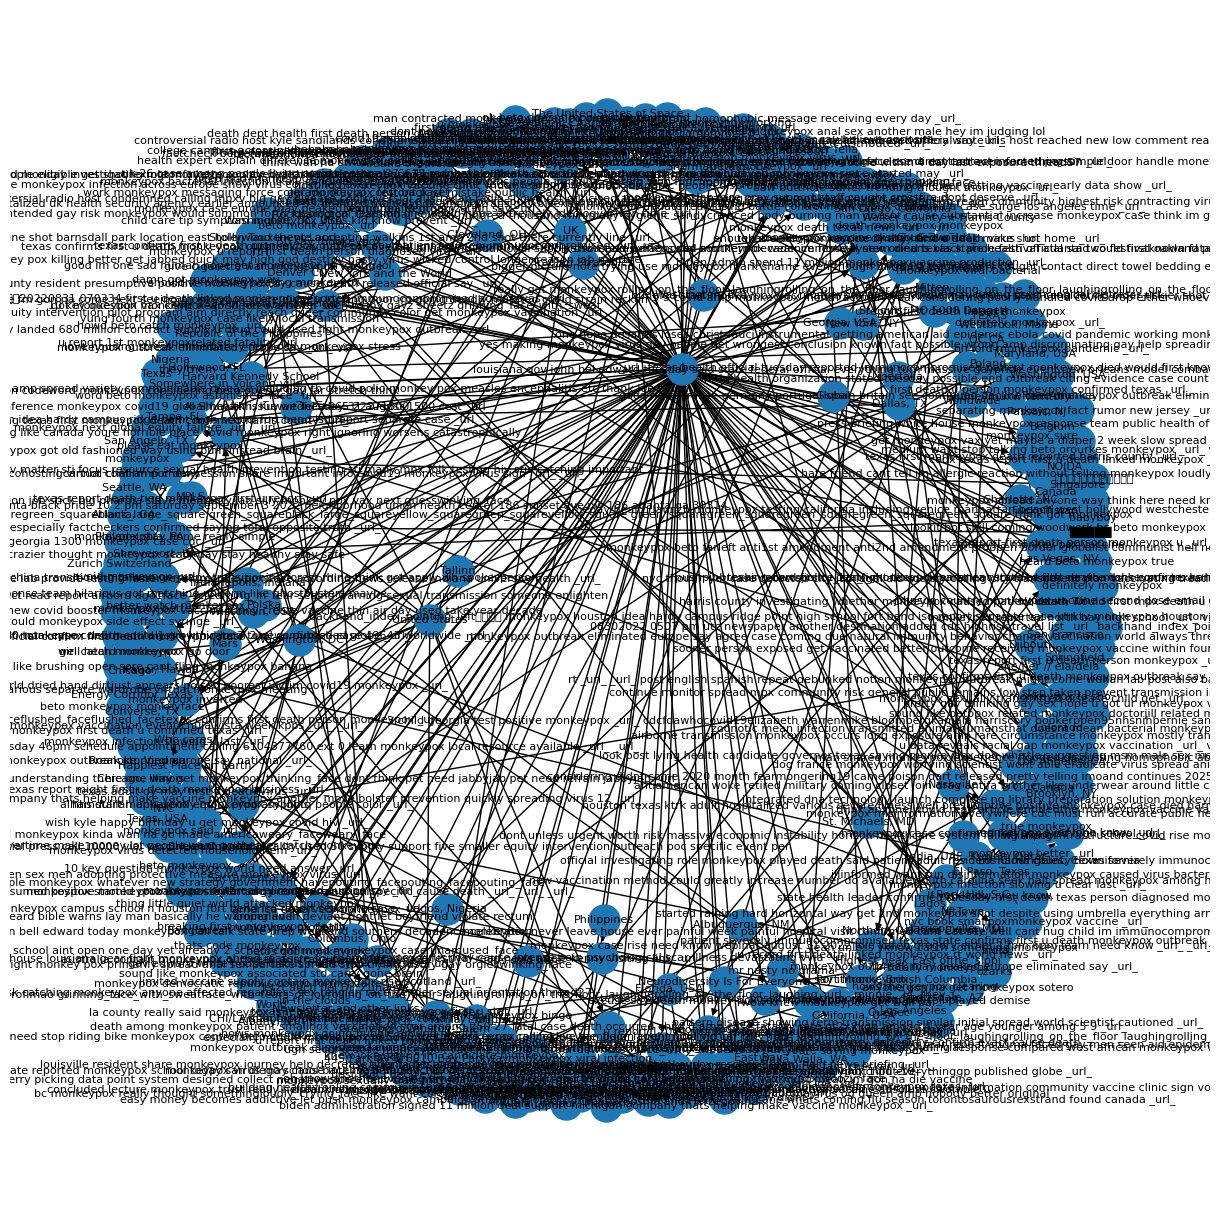

In [ ]:
# show the graph

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, font_size=8)
plt.show()


### Trend Detection Algorithms

In [ ]:
# get centrality measures to identify key influencers
try:
    centrality = nx.degree_centrality(G)
    top_influencers = Counter(centrality).most_common(5)
    print("Top influencers based on centrality:", top_influencers)
except Exception as e:
    print("Error computing centrality:", e)

Top influencers based on centrality: [(0, 0.22682445759368838), ('United States', 0.01972386587771203), ('monkeypox', 0.013806706114398423), ('Washington, DC', 0.01183431952662722), ('India', 0.009861932938856016)]


## Centrality Measures (to detect influencers):

In [ ]:
# Calculate PageRank to find influencers
pagerank = nx.pagerank(G)
top_influencers = sorted(pagerank, key=pagerank.get, reverse=True)[:10]
for influencer in top_influencers:
    print(f"Influencer tweet: {influencer}, PageRank: {pagerank[influencer]}")

Influencer tweet: hosting monkeypox vaccine clinic friday learn moresignup _url_, PageRank: 0.003365715085083878
Influencer tweet: patient severely immunocompromised texas state confirms first u death monkeypox outbreak _url_ _url_, PageRank: 0.003365715085083878
Influencer tweet: yung fourth monkeypox case likely local transmission, PageRank: 0.003365715085083878
Influencer tweet: harris county investigating whether monkeypox caused patient death would first mpx death u patient also various severe illness _url_ via, PageRank: 0.003365715085083878
Influencer tweet: person texas diagnosed monkeypox weak immune system died texas state health official said could firstknown fatality virus u _url_, PageRank: 0.003365715085083878
Influencer tweet: breaking first u monkeypox death, PageRank: 0.003365715085083878
Influencer tweet: building healthy online community urgent need support monkeypox vaccine locator theyre looking volunteer help confirm update information community vaccine clinic sig

### Trend Tracking

In [ ]:
# Create snapshots over time by filtering data based on created_at
# Group data by time intervals, e.g., weekly, monthly
df['week'] = df['created_at'].dt.isocalendar().week

# Track changes in graph properties, e.g., degree centrality
for week in df['week'].unique():
    weekly_data = df[df['week'] == week]
    G_week = nx.DiGraph()
    for index, row in weekly_data.iterrows():
        G_week.add_edge(row['user location'], row['text'], weight=row['retweet_count'])

    # Centrality for this snapshot
    centrality_week = nx.degree_centrality(G_week)
    for node, centrality in centrality_week.items():
        print(f"Week: {week}, Node: {node}, Centrality: {centrality}")


Week: 35, Node: TEXAS, Centrality: 0.001447178002894356
Week: 35, Node: _url_ texas health official tuesday reported immunocompromised patient monkeypox died would first known death virus unit, Centrality: 0.001447178002894356
Week: 35, Node: 0, Centrality: 0.21128798842257596
Week: 35, Node: backhand_index_pointing_left主页主页 monkeypox houston idea hardy campus ridge point high school fort bend isd report separate case ktrktv monkeypox houston idea hardy campus ridge point high school fort bend isd report separate case ktrktvview full coverage google news _url_, Centrality: 0.001447178002894356
Week: 35, Node: flushed_faceflushed_faceflushed_faceflushed_facetexas confirms first death person monkeypox _url_, Centrality: 0.001447178002894356
Week: 35, Node: San Antonio, TX, Centrality: 0.001447178002894356
Week: 35, Node: pushpinbreaking newspolice_car_light texas department state health service dshs confirms harris county texas resident died monkeypox _url_, Centrality: 0.001447178002894

In [ ]:
df['timestamp'] = pd.to_datetime(df['created_at']).astype(int) / 10**9

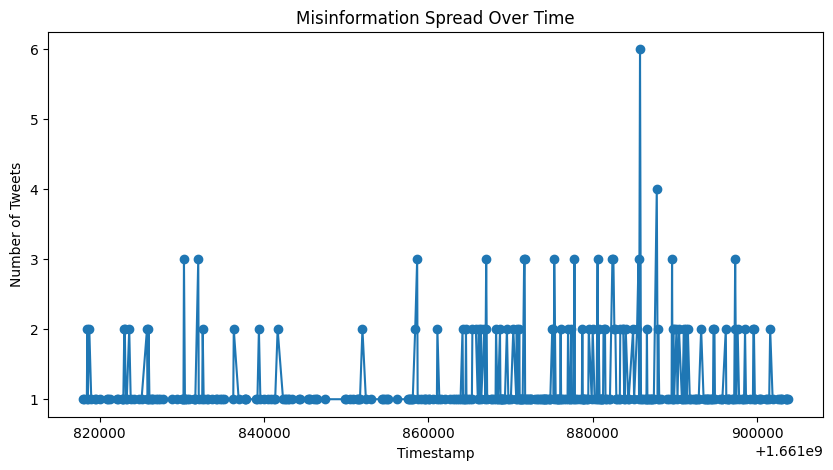

In [ ]:
# Calculate growth patterns
growth_data = df.groupby('timestamp').size()

# Plot growth patterns
plt.figure(figsize=(10, 5))
plt.plot(growth_data.index, growth_data.values, marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('Misinformation Spread Over Time')
plt.show()

In [ ]:
import networkx as nx

# Assuming G is your graph
centrality = nx.degree_centrality(G)


In [ ]:
print(type(centrality))  # Should be <class 'dict'>

<class 'dict'>


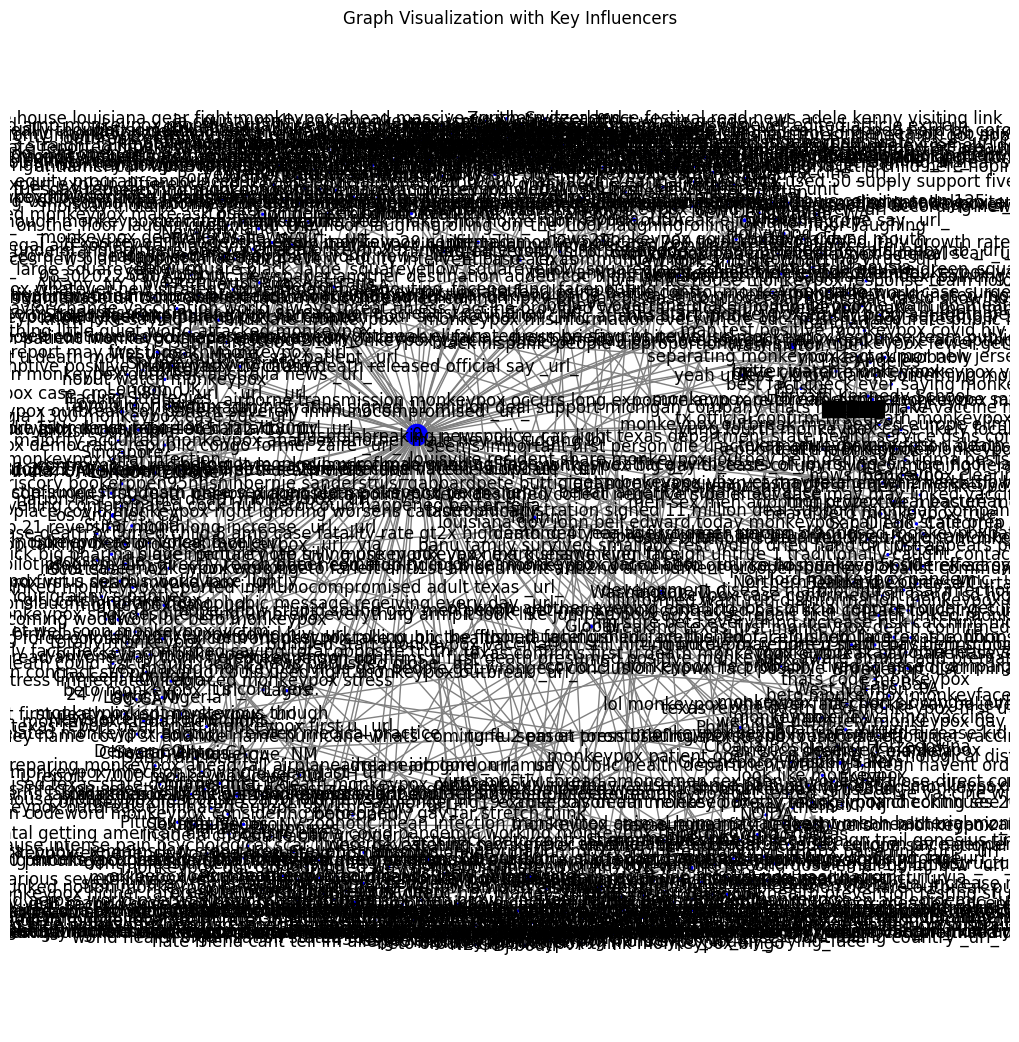

In [ ]:
import matplotlib.pyplot as plt

# Example of setting node sizes based on centrality
node_sizes = [v * 1000 for k, v in centrality.items()]  # Scale size for better visualization

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=node_sizes, node_color='blue', edge_color='gray')
plt.title('Graph Visualization with Key Influencers')
plt.show()

In [ ]:
df['centrality'] = df['user location'].map(centrality)

In [ ]:
df['followers_count'] = df['followers count']

In [ ]:
df.head()

number          created_at  \
0    3047 2022-08-30 19:51:00   
1   10879 2022-08-30 07:10:00   
2    5545 2022-08-30 16:59:00   
3    4916 2022-08-30 17:42:00   
4    2863 2022-08-30 20:02:00   

                                                text               source  \
0  _url_ texas health official tuesday reported i...  Twitter for Android   
1  backhand_index_pointing_left主页主页 monkeypox hou...              dlvr.it   
2  flushed_faceflushed_faceflushed_faceflushed_fa...   Twitter for iPhone   
3  pushpinbreaking newspolice_car_light texas dep...   Twitter for iPhone   
4  hosting monkeypox vaccine clinic friday learn ...   Twitter for iPhone   

   user is verified  user has url  \
0             False         False   
1             False         False   
2             False         False   
3              True         False   
4             False          True   

                                    user description     user created at  \
0  [turn, cheek, many, timesbefore, start, spitti... 2019-06-10 23:56:00   
1    [稀有优质资源backhand_index_pointing_right电报群, _url_] 2022-08-16 08:54:00   
2  [safe, space, gayqueerbiand, sex, positive, bl... 2018-04-14 15:25:00   
3  [anchorreporter, woai, news, 4, kabb, fox, 29,... 2009-04-16 17:13:00   
4  [treuhaft, chairsr, fellow, lecturer, mcac, oh... 2009-05-17 05:49:00   

   retweet_count  reply_count  ...  tweet count  listed_count  \
0              0            0  ...        36196             2   
1              1            0  ...         1075             0   
2              0            0  ...          850             1   
3              0            0  ...         3614            47   
4              4            0  ...        17065            37   

     user location  beto_flag  binary_class  ternary_class week     timestamp  \
0            TEXAS      False             0              0   35  1.661889e+09   
1                0      False             0              0   35  1.661843e+09   
2                0      False             0              0   35  1.661879e+09   
3  San Antonio, TX      False             0              0   35  1.661881e+09   
4    Cleveland, OH      False             0              0   35  1.661890e+09   

   centrality  followers_count  
0    0.001972             3377  
1    0.226824                3  
2    0.226824              388  
3    0.001972             1622  
4    0.003945             2245  

[5 rows x 24 columns]

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assume 'df' is your dataframe with features and labels
features = ['centrality', 'retweet_count', 'reply_count', 'like_count', 'followers_count']
X = df[features]
y = df['binary_class']  # Target variable for classification

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        90
           1       0.10      0.10      0.10        10

    accuracy                           0.82       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.82      0.82      0.82       100



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best parameters
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.7875
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100



In [ ]:
# Greedy approach example (assuming you have a cost function)
def greedy_approach(X_test, model):
  """
  A simple greedy approach for selecting the best predictions.
  """
  predictions = model.predict_proba(X_test)  # Get probabilities
  best_predictions = []
  for i in range(len(X_test)):
    # Select the class with the highest probability
    predicted_class = np.argmax(predictions[i])
    best_predictions.append(predicted_class)
  return best_predictions

# Example usage:
greedy_predictions = greedy_approach(X_test, best_model)
greedy_accuracy = accuracy_score(y_test, greedy_predictions)

print(f"Greedy Approach Accuracy: {greedy_accuracy:.2f}")

Greedy Approach Accuracy: 0.90
